<a href="https://colab.research.google.com/github/Katerine-Chanci-Echeverri/sales-predictions/blob/main/Sales_predictions_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto 1 - Final**

## **Datos personales**

*   **Nombre:** Katerine Chancí Echeverri
*   **ID Coding Dojo:** 80837
*   Track: Machine Learning

## **Descripción del problema**

Esta semana finalizarán el proyecto de predicción de ventas. El objetivo de esto es ayudar al distribuidor comprender las propiedades de los productos y los puntos de venta que desempeñan un papel crucial en la predicción de las ventas.



1.   La primera tarea será crear un modelo de regresión lineal para predecir las ventas.

>*   Creen un modelo de regresión lineal.
>*   Evalúen el rendimiento del modelo basándose en $R^2$. 
>*   Evalúen el rendimiento del modelo basándose en RECM.

2.   La segunda tarea será crear un modelo de árbol de regresión para predecir las ventas.

>*   Creen un modelo simple de árbol de regresión.
>*   Comparen el rendimiento del modelo basándose en $R^2$.
>*   Comparen el rendimiento del modelo basándose en RECM.  

3.   Acaban de intentar 2 diferentes modelos en el conjunto de datos. Deben determinar qué modelo implementar.

>*   En general, ¿qué modelo recomiendan?
>*   Justifiquen su recomendación.

4.   Para concluir este proyecto, deben prepara una presentación ejecutiva (no técnica) sobre el proyecto.

## **Descripción del conjunto de datos**

| **Nombre de la variable** | **Descripción**                                                                                                       |
|---------------------------|-----------------------------------------------------------------------------------------------------------------------|
| Item_Identifier           | Identificación única del producto                                                                                     |
| Item_Weight               | Peso del producto                                                                                                     |
| Item_Fat_Content          | Si el producto es bajo en grasa o regular                                                                             |
| Item_Visibility           | El porcentaje de la superficie total de exposición de todos los productos de una tienda asignada al producto concreto |
| Item_Type                 | La categoría a la que el producto pertenece                                                                           |
| Item_MRP                  | Precio máximo de venta al público (precio de catálogo) del producto                                                   |
| Outlet_Identifier         | Identificación única de la tienda                                                                                     |
| Outlet_Establishment_Year | El año cuando se estableció la tienda                                                                                 |
| Outlet_Size               | El tamaño de la tienda con respecto a la superficie                                                                   |
| Outlet_Location_Type      | El tipo de área donde está ubicada la tienda                                                                          |
| Outlet_Type               | Si el marcado es un almacén o algún tipo de supermercado                                                              |
| Item_Outlet_Sales         | Ventas del producto en la tienda particular Es la variable objetivo a predecir                                        |

## **Importar bibliotecas**

In [1]:
from google.colab import drive
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn import set_config
set_config(display='diagram')
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

## **Cargar los datos**

In [2]:
drive.mount("/content/drive")
sales_predictions = "/content/drive/MyDrive/Colab Notebooks/Coding Dojo 🐉/Proyecto/sales_predictions.csv"
salesp_df = pd.read_csv(sales_predictions)
salesp_df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## **Preprocesamiento de datos**

In [3]:
salesp_df = salesp_df.drop(columns ="Item_Identifier")

In [4]:
salesp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                7060 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                6113 non-null   object 
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 732.6+ KB


In [5]:
#Codificación ordinal de la columna "Item_Fat_Content"
replacement_dic = {"LF": "Low Fat", "low fat": "Low Fat", "reg": "Regular"}
salesp_df["Item_Fat_Content"].replace(replacement_dic, inplace = True)
salesp_df["Item_Fat_Content"].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [6]:
#División de validación 
X = salesp_df.drop(columns = "Item_Outlet_Sales")
y = salesp_df["Item_Outlet_Sales"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [7]:
#Instanciar selectores de columnas 
cat_selector = make_column_selector(dtype_include = "object")
num_selector = make_column_selector(dtype_include = "number")

In [8]:
#Instanciar transformadores

#Imputers
freq_imputer = SimpleImputer(strategy = "most_frequent")
mean_imputer = SimpleImputer(strategy = "mean")

#Scaler
#scaler = StandardScaler() #No vamos a escalar

#OHE
ohe = OneHotEncoder(handle_unknown = "ignore", sparse = False)

In [9]:
#Instanciar Pipelines

#Numeric pipeline
numeric_pipe = make_pipeline(mean_imputer)
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer())])

In [10]:
#Categorical pipeline
categorical_pipe = make_pipeline(freq_imputer, ohe)
categorical_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [11]:
#Instanciar ColumnTransformer

#Tuplas para ColumnTransformer
number_tuple   = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)

#ColumnTransformer
preprocessor = make_column_transformer(number_tuple, category_tuple)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f620facfaf0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f620facfbb0>)])

In [12]:
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f620facfaf0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f620facfbb0>)])

In [13]:
#Transformar los datos
X_train_processed = preprocessor.transform(X_train)
X_test_processed  = preprocessor.transform(X_test)

In [14]:
# Comprueben los valores faltantes y tengan una codificación one-hot
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of data is', X_train_processed.shape)
print('\n')
X_train_processed

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (6392, 42)




array([[1.63500000e+01, 2.95653090e-02, 2.56464600e+02, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.52500000e+01, 0.00000000e+00, 1.79766000e+02, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.23500000e+01, 1.58715731e-01, 1.57294600e+02, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.76000000e+01, 1.89436660e-02, 2.37359000e+02, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.03500000e+01, 5.43626950e-02, 1.17946600e+02, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.63500000e+01, 1.69932040e-02, 9.57410000e+01, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [15]:
#Transformar de Numpy Array a DataFrame
X_train = pd.DataFrame(X_train_processed)
X_test = pd.DataFrame(X_test_processed)

## **Modelo de regresión lineal**


1.   La primera tarea será crear un modelo de regresión lineal para predecir las ventas.

In [16]:
#Instanciar la regresión lineal
reg = LinearRegression()

In [17]:
#Entrenar el modelo 
reg.fit(X_train,y_train)

LinearRegression()

In [18]:
#Predicciones del modelo 
train_preds = reg.predict(X_train)
test_preds = reg.predict(X_test)

Evalúen el rendimiento del modelo basándose en $R^2$

In [19]:
#Rendimiento evaluado con R^2
r2_train = r2_score(y_train, train_preds)
r2_test  = r2_score(y_test, test_preds)
print(r2_train)
print(r2_test)

0.5615551419174629
0.5671041872384911


Evalúen el rendimiento del modelo basándose en RECM

In [20]:
rmse_train = np.sqrt(mean_squared_error(y_train, train_preds))
rmse_test = np.sqrt(mean_squared_error(y_test, test_preds))
print(rmse_train)
print(rmse_test)

1139.1040937388918
1092.8630817241497


## **Modelo de árbol de regresión**

In [21]:
#Instanciar el modelo
dec_tree = DecisionTreeRegressor(random_state = 42)

In [22]:
#Entrenar el modelo
dec_tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [23]:
#Predicciones del modelo
train_preds = dec_tree.predict(X_train)
test_preds = dec_tree.predict(X_test)

Evalúen el rendimiento del modelo basándose en $R^2$

In [24]:
#Rendimiento del modelo evaluado en R^2
train_score = dec_tree.score(X_train, y_train)
test_score = dec_tree.score(X_test, y_test)
print(train_score)
print(test_score)

1.0
0.18408602434746324


Observamos que el modelo está sobreajustado. Vamos a ajustar el modelo.

In [25]:
#Profundidad del árbol
dec_tree.get_depth()

40

In [26]:
#Calculemos el valor optimo para max_depth
# Lista de valores a probar para max_depth:
max_depth_range = list(range(2, 40))
# Lista para almacenar la puntuación para cada valor de max_depth:
r2 = []
for depth in max_depth_range:
    dec_tree = DecisionTreeRegressor(max_depth = depth, 
                             random_state = 42)
    dec_tree.fit(X_train, y_train)
    score = dec_tree.score(X_test, y_test)
    r2.append(score)

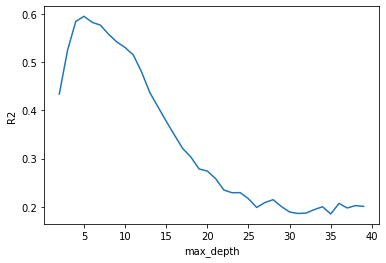

In [27]:
# Visualiza qué max_depth lleva a una puntuación R2 más alta
import matplotlib.pyplot as plt
plt.plot(max_depth_range, r2)
plt.xlabel('max_depth')
plt.ylabel('R2');

In [28]:
# Ejecutemos el modelo con nuestro valor optimizado para max_depth
dec_tree_5 = DecisionTreeRegressor(max_depth = 5, random_state = 42)
dec_tree_5.fit(X_train, y_train)
train_5_score = dec_tree_5.score(X_train, y_train)
test_5_score = dec_tree_5.score(X_test, y_test)
print(train_5_score)
print(test_5_score)

0.6039397477322956
0.5947099753159972


Mejora bastante el rendimiento del modelo. 

Evalúen el rendimiento del modelo basándose en RECM

In [30]:
train_preds = dec_tree_5.predict(X_train)
test_preds = dec_tree_5.predict(X_test)
rmse_train = np.sqrt(mean_squared_error(y_train, train_preds))
rmse_test = np.sqrt(mean_squared_error(y_test, test_preds))
print(rmse_train)
print(rmse_test)

1082.6461900869947
1057.4431299496734


## **Determinar qué modelo implementar**

En general, ¿qué modelo recomiendan?

Basada en los valores de rendimiento, tanto para el conjunto de entrenamiento como para el conjunto de prueba, recomiento usar el modelo de árbol de decisión para este conjunto de datos. Este modelo muestra un mejor rendimiento, tanto si es determinado con $R^2$ como con RECM. 